In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\zahee\\Desktop\\Data Science\\Project ExcelR\\telecommunications_churn.csv")
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [3]:
df.drop(['voice_mail_plan','day_charge','evening_charge','night_charge', 'international_charge',
        'account_length','day_calls','night_calls','evening_calls'],axis=1, inplace=True)
df

,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,international_calls,total_charge,churn
0,25,265.1,197.4,244.7,10.0,1,0,3,75.56,0
1,26,161.6,195.5,254.4,13.7,1,0,3,59.24,0
2,0,243.4,121.2,162.6,12.2,0,0,5,62.29,0
3,0,299.4,61.9,196.9,6.6,2,1,7,66.80,0
4,0,166.7,148.3,186.9,10.1,3,1,3,52.09,0
...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,215.5,279.1,9.9,2,0,6,60.10,0
3329,0,231.1,153.4,191.3,9.6,3,0,4,63.53,0
3330,0,180.8,288.8,191.9,14.1,2,0,6,67.74,0
3331,0,213.8,159.6,139.2,5.0,2,1,10,57.53,0


In [4]:
#Splitting data into input and output variables
x=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [5]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
X=scale.fit_transform(x)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
np.random.seed(7)

In [9]:
model=Sequential()
model.add(Dense(9,input_dim=9,activation='LeakyReLU'))
model.add(Dropout(0.3))
model.add(Dense(6,activation='LeakyReLU'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history=model.fit(X,Y,validation_split=0.33, epochs=250, batch_size=8)

Epoch 1/250
280/280 [==============================] - 2s 4ms/step - loss: 0.6167 - accuracy: 0.6946 - val_loss: 0.4147 - val_accuracy: 0.8509
Epoch 2/250
280/280 [==============================] - 1s 3ms/step - loss: 0.4035 - accuracy: 0.8545 - val_loss: 0.3538 - val_accuracy: 0.8418
Epoch 3/250
280/280 [==============================] - 1s 3ms/step - loss: 0.3650 - accuracy: 0.8603 - val_loss: 0.3478 - val_accuracy: 0.8409
Epoch 4/250
280/280 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8612 - val_loss: 0.3422 - val_accuracy: 0.8409
Epoch 5/250
280/280 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8657 - val_loss: 0.3370 - val_accuracy: 0.8436
Epoch 6/250
280/280 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8706 - val_loss: 0.3298 - val_accuracy: 0.8445
Epoch 7/250
280/280 [==============================] - 1s 3ms/step - loss: 0.3342 - accuracy: 0.8706 - val_loss: 0.3215 - val_accuracy: 0.8545

Epoch 58/250
280/280 [==============================] - 1s 4ms/step - loss: 0.2735 - accuracy: 0.8966 - val_loss: 0.2731 - val_accuracy: 0.8882
Epoch 59/250
280/280 [==============================] - 1s 4ms/step - loss: 0.2738 - accuracy: 0.8894 - val_loss: 0.2704 - val_accuracy: 0.8900
Epoch 60/250
280/280 [==============================] - 1s 4ms/step - loss: 0.2702 - accuracy: 0.8966 - val_loss: 0.2703 - val_accuracy: 0.8818
Epoch 61/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2761 - accuracy: 0.8997 - val_loss: 0.2699 - val_accuracy: 0.8900
Epoch 62/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2732 - accuracy: 0.8961 - val_loss: 0.2689 - val_accuracy: 0.8882
Epoch 63/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2717 - accuracy: 0.8952 - val_loss: 0.2671 - val_accuracy: 0.8936
Epoch 64/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2865 - accuracy: 0.8970 - val_loss: 0.2677 - val_accuracy:

Epoch 115/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2798 - accuracy: 0.8979 - val_loss: 0.2650 - val_accuracy: 0.8927
Epoch 116/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2745 - accuracy: 0.8974 - val_loss: 0.2668 - val_accuracy: 0.8909
Epoch 117/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2766 - accuracy: 0.8948 - val_loss: 0.2705 - val_accuracy: 0.8882
Epoch 118/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2679 - accuracy: 0.9010 - val_loss: 0.2655 - val_accuracy: 0.8945
Epoch 119/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2714 - accuracy: 0.9006 - val_loss: 0.2648 - val_accuracy: 0.8945
Epoch 120/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2810 - accuracy: 0.8966 - val_loss: 0.2696 - val_accuracy: 0.8873
Epoch 121/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2698 - accuracy: 0.8966 - val_loss: 0.2654 - val_ac

280/280 [==============================] - 1s 4ms/step - loss: 0.2582 - accuracy: 0.9051 - val_loss: 0.2672 - val_accuracy: 0.8836
Epoch 172/250
280/280 [==============================] - 1s 4ms/step - loss: 0.2828 - accuracy: 0.8925 - val_loss: 0.2681 - val_accuracy: 0.8909
Epoch 173/250
280/280 [==============================] - 1s 4ms/step - loss: 0.2820 - accuracy: 0.8970 - val_loss: 0.2678 - val_accuracy: 0.8891
Epoch 174/250
280/280 [==============================] - 1s 4ms/step - loss: 0.2735 - accuracy: 0.9001 - val_loss: 0.2663 - val_accuracy: 0.8945
Epoch 175/250
280/280 [==============================] - 1s 4ms/step - loss: 0.2693 - accuracy: 0.8961 - val_loss: 0.2720 - val_accuracy: 0.8873
Epoch 176/250
280/280 [==============================] - 1s 4ms/step - loss: 0.2771 - accuracy: 0.8948 - val_loss: 0.2714 - val_accuracy: 0.8845
Epoch 177/250
280/280 [==============================] - 1s 4ms/step - loss: 0.2764 - accuracy: 0.8979 - val_loss: 0.2655 - val_accuracy: 0.8909

280/280 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.8979 - val_loss: 0.2683 - val_accuracy: 0.8945
Epoch 228/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.8907 - val_loss: 0.2689 - val_accuracy: 0.8882
Epoch 229/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.8974 - val_loss: 0.2655 - val_accuracy: 0.8955
Epoch 230/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2712 - accuracy: 0.9028 - val_loss: 0.2648 - val_accuracy: 0.8918
Epoch 231/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.8952 - val_loss: 0.2668 - val_accuracy: 0.8864
Epoch 232/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2742 - accuracy: 0.8974 - val_loss: 0.2609 - val_accuracy: 0.8991
Epoch 233/250
280/280 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.8948 - val_loss: 0.2702 - val_accuracy: 0.8864

In [11]:
score=model.evaluate(X,Y)
print(score)
print("The {} of the model is {}".format(model.metrics_names[1],score[1]*100))

105/105 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.8962
[0.25424039363861084, 0.8961896300315857]
The accuracy of the model is 89.61896300315857


In [12]:
history.history

{'loss': [0.6167497038841248,
  0.4034636318683624,
  0.3649817109107971,
  0.3639274537563324,
  0.3405354917049408,
  0.339633047580719,
  0.33416420221328735,
  0.32411035895347595,
  0.3115294277667999,
  0.314006507396698,
  0.3034878373146057,
  0.2990928590297699,
  0.2970026731491089,
  0.30335545539855957,
  0.29038867354393005,
  0.28868368268013,
  0.3031056225299835,
  0.2885136008262634,
  0.2952922284603119,
  0.2837258279323578,
  0.29440978169441223,
  0.29796943068504333,
  0.2863723635673523,
  0.2891618609428406,
  0.29083117842674255,
  0.29337629675865173,
  0.29004400968551636,
  0.2868855893611908,
  0.28179726004600525,
  0.28964537382125854,
  0.2924768924713135,
  0.2963544726371765,
  0.2814733386039734,
  0.27835899591445923,
  0.27722254395484924,
  0.27438995242118835,
  0.2839750349521637,
  0.2878589928150177,
  0.28049901127815247,
  0.2820967435836792,
  0.27561354637145996,
  0.27715617418289185,
  0.2757847011089325,
  0.2800336480140686,
  0.2807741

In [13]:
model.history.history.keys()

dict_keys([])

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

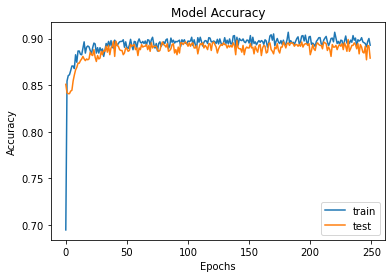

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

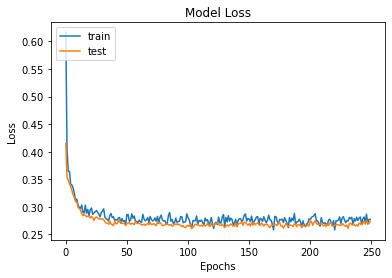

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [17]:
y_pred = model.predict(X)
y_pred

105/105 [==============================] - 0s 2ms/step


array([[0.09074394],
       [0.02591126],
       [0.02283588],
       ...,
       [0.1200471 ],
       [0.22082478],
       [0.05164788]], dtype=float32)

In [18]:
y_pred[1][0]

0.02591126

In [19]:
for i in range(len(y_pred)):
    if y_pred[i][0]>0.5:
        y_pred[i][0]=1
    else:
        y_pred[i][0]=0
    print(y_pred[i][0])    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,y_pred)
cm

array([[2845,    5],
       [ 341,  142]], dtype=int64)

### Hence, there are 341 False Negatives owing to class imbalance.

In [21]:
TN=2845
TP=142
FN=341
FP=5

# Sensitivity

In [22]:
sensitivity = (TP/(TP+FN))*100
sensitivity

29.39958592132505

# Specificity

In [23]:
specificity= (TN/(TN+FP))*100
specificity

99.82456140350877

# Precision

In [24]:
precision = (TP/(TP+FP))*100
precision

96.5986394557823

# F score

In [25]:
f_score= (2*precision*sensitivity)/(precision+sensitivity)
f_score

45.079365079365076

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2850
           1       0.97      0.29      0.45       483

    accuracy                           0.90      3333
   macro avg       0.93      0.65      0.70      3333
weighted avg       0.90      0.90      0.87      3333



In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

0.646120736624169


Text(0, 0.5, 'True Positive Rate')

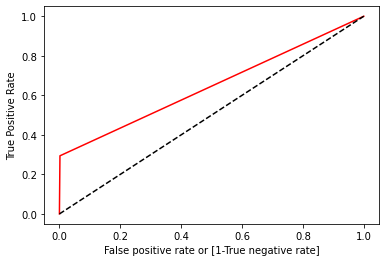

In [28]:
fpr,tpr, thresholds = roc_curve(Y,y_pred)

auc= roc_auc_score(Y,y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr, color='red', label = 'logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False positive rate or [1-True negative rate]')
plt.ylabel('True Positive Rate')

### Optimizing model through Weighted Neural Network or Cost Sensitive Neural Network

In [29]:
model1=Sequential()
model1.add(Dense(9,input_dim=9,activation='LeakyReLU'))
model1.add(Dropout(0.3))
model1.add(Dense(6,activation='LeakyReLU'))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
weights={0:1, 1:6}
history1=model1.fit(X,Y,validation_split=0.33, epochs=500, batch_size=8, class_weight=weights)

Epoch 1/500
280/280 [==============================] - 2s 4ms/step - loss: 1.1732 - accuracy: 0.6305 - val_loss: 0.6252 - val_accuracy: 0.7527
Epoch 2/500
280/280 [==============================] - 1s 3ms/step - loss: 1.0788 - accuracy: 0.7044 - val_loss: 0.5915 - val_accuracy: 0.7973
Epoch 3/500
280/280 [==============================] - 1s 3ms/step - loss: 1.0685 - accuracy: 0.7349 - val_loss: 0.5786 - val_accuracy: 0.7900
Epoch 4/500
280/280 [==============================] - 1s 3ms/step - loss: 1.0041 - accuracy: 0.7555 - val_loss: 0.5595 - val_accuracy: 0.7682
Epoch 5/500
280/280 [==============================] - 1s 4ms/step - loss: 1.0046 - accuracy: 0.7631 - val_loss: 0.5475 - val_accuracy: 0.7755
Epoch 6/500
280/280 [==============================] - 1s 4ms/step - loss: 0.9675 - accuracy: 0.7658 - val_loss: 0.5297 - val_accuracy: 0.7809
Epoch 7/500
280/280 [==============================] - 1s 4ms/step - loss: 0.9697 - accuracy: 0.7761 - val_loss: 0.5192 - val_accuracy: 0.7818

Epoch 58/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7732 - accuracy: 0.8401 - val_loss: 0.3745 - val_accuracy: 0.8645
Epoch 59/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7406 - accuracy: 0.8531 - val_loss: 0.3824 - val_accuracy: 0.8536
Epoch 60/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7803 - accuracy: 0.8388 - val_loss: 0.3784 - val_accuracy: 0.8564
Epoch 61/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7830 - accuracy: 0.8464 - val_loss: 0.3829 - val_accuracy: 0.8609
Epoch 62/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7893 - accuracy: 0.8451 - val_loss: 0.3830 - val_accuracy: 0.8655
Epoch 63/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7715 - accuracy: 0.8365 - val_loss: 0.3787 - val_accuracy: 0.8709
Epoch 64/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7795 - accuracy: 0.8410 - val_loss: 0.3801 - val_accuracy:

Epoch 115/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7516 - accuracy: 0.8446 - val_loss: 0.3633 - val_accuracy: 0.8718
Epoch 116/500
280/280 [==============================] - 1s 3ms/step - loss: 0.7684 - accuracy: 0.8527 - val_loss: 0.3606 - val_accuracy: 0.8773
Epoch 117/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7446 - accuracy: 0.8513 - val_loss: 0.3559 - val_accuracy: 0.8845
Epoch 118/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7452 - accuracy: 0.8576 - val_loss: 0.3665 - val_accuracy: 0.8682
Epoch 119/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7526 - accuracy: 0.8518 - val_loss: 0.3536 - val_accuracy: 0.8800
Epoch 120/500
280/280 [==============================] - 1s 3ms/step - loss: 0.7858 - accuracy: 0.8504 - val_loss: 0.3605 - val_accuracy: 0.8818
Epoch 121/500
280/280 [==============================] - 1s 3ms/step - loss: 0.7866 - accuracy: 0.8446 - val_loss: 0.3825 - val_ac

280/280 [==============================] - 1s 4ms/step - loss: 0.7596 - accuracy: 0.8500 - val_loss: 0.3524 - val_accuracy: 0.8845
Epoch 172/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7743 - accuracy: 0.8531 - val_loss: 0.3757 - val_accuracy: 0.8664
Epoch 173/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7859 - accuracy: 0.8316 - val_loss: 0.3715 - val_accuracy: 0.8709
Epoch 174/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7558 - accuracy: 0.8536 - val_loss: 0.3648 - val_accuracy: 0.8845
Epoch 175/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7480 - accuracy: 0.8536 - val_loss: 0.3609 - val_accuracy: 0.8791
Epoch 176/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7745 - accuracy: 0.8343 - val_loss: 0.3608 - val_accuracy: 0.8855
Epoch 177/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7539 - accuracy: 0.8576 - val_loss: 0.3626 - val_accuracy: 0.8836

280/280 [==============================] - 1s 4ms/step - loss: 0.7316 - accuracy: 0.8518 - val_loss: 0.3561 - val_accuracy: 0.8836
Epoch 228/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7503 - accuracy: 0.8531 - val_loss: 0.3471 - val_accuracy: 0.8818
Epoch 229/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7735 - accuracy: 0.8455 - val_loss: 0.3596 - val_accuracy: 0.8800
Epoch 230/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7570 - accuracy: 0.8549 - val_loss: 0.3733 - val_accuracy: 0.8682
Epoch 231/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7759 - accuracy: 0.8455 - val_loss: 0.3660 - val_accuracy: 0.8773
Epoch 232/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7442 - accuracy: 0.8589 - val_loss: 0.3620 - val_accuracy: 0.8827
Epoch 233/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7536 - accuracy: 0.8500 - val_loss: 0.3543 - val_accuracy: 0.8791

280/280 [==============================] - 1s 3ms/step - loss: 0.7559 - accuracy: 0.8630 - val_loss: 0.3481 - val_accuracy: 0.8864
Epoch 284/500
280/280 [==============================] - 1s 4ms/step - loss: 0.8129 - accuracy: 0.8433 - val_loss: 0.3631 - val_accuracy: 0.8873
Epoch 285/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7563 - accuracy: 0.8580 - val_loss: 0.3753 - val_accuracy: 0.8736
Epoch 286/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7264 - accuracy: 0.8509 - val_loss: 0.3615 - val_accuracy: 0.8755
Epoch 287/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7607 - accuracy: 0.8504 - val_loss: 0.3608 - val_accuracy: 0.8782
Epoch 288/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7686 - accuracy: 0.8531 - val_loss: 0.3594 - val_accuracy: 0.8791
Epoch 289/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7703 - accuracy: 0.8531 - val_loss: 0.3615 - val_accuracy: 0.8791

280/280 [==============================] - 1s 4ms/step - loss: 0.7775 - accuracy: 0.8500 - val_loss: 0.3577 - val_accuracy: 0.8873
Epoch 340/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7596 - accuracy: 0.8491 - val_loss: 0.3564 - val_accuracy: 0.8818
Epoch 341/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7563 - accuracy: 0.8473 - val_loss: 0.3556 - val_accuracy: 0.8864
Epoch 342/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7962 - accuracy: 0.8509 - val_loss: 0.3555 - val_accuracy: 0.8864
Epoch 343/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7839 - accuracy: 0.8451 - val_loss: 0.3612 - val_accuracy: 0.8836
Epoch 344/500
280/280 [==============================] - 1s 4ms/step - loss: 0.8037 - accuracy: 0.8433 - val_loss: 0.3742 - val_accuracy: 0.8809
Epoch 345/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7637 - accuracy: 0.8500 - val_loss: 0.3678 - val_accuracy: 0.8800

280/280 [==============================] - 1s 4ms/step - loss: 0.7680 - accuracy: 0.8495 - val_loss: 0.3531 - val_accuracy: 0.8855
Epoch 396/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7692 - accuracy: 0.8491 - val_loss: 0.3623 - val_accuracy: 0.8782
Epoch 397/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7508 - accuracy: 0.8576 - val_loss: 0.3547 - val_accuracy: 0.8827
Epoch 398/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7818 - accuracy: 0.8518 - val_loss: 0.3567 - val_accuracy: 0.8827
Epoch 399/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7405 - accuracy: 0.8594 - val_loss: 0.3528 - val_accuracy: 0.8800
Epoch 400/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7599 - accuracy: 0.8509 - val_loss: 0.3639 - val_accuracy: 0.8809
Epoch 401/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7716 - accuracy: 0.8464 - val_loss: 0.3665 - val_accuracy: 0.8827

280/280 [==============================] - 1s 4ms/step - loss: 0.7531 - accuracy: 0.8468 - val_loss: 0.3576 - val_accuracy: 0.8864
Epoch 452/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7825 - accuracy: 0.8433 - val_loss: 0.3619 - val_accuracy: 0.8764
Epoch 453/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7721 - accuracy: 0.8482 - val_loss: 0.3671 - val_accuracy: 0.8809
Epoch 454/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7324 - accuracy: 0.8518 - val_loss: 0.3655 - val_accuracy: 0.8736
Epoch 455/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7722 - accuracy: 0.8383 - val_loss: 0.3670 - val_accuracy: 0.8727
Epoch 456/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7755 - accuracy: 0.8491 - val_loss: 0.3670 - val_accuracy: 0.8791
Epoch 457/500
280/280 [==============================] - 1s 4ms/step - loss: 0.7664 - accuracy: 0.8459 - val_loss: 0.3588 - val_accuracy: 0.8827

In [31]:
score=model1.evaluate(X,Y)
print(score)
print("The {} of the model is {}".format(model1.metrics_names[1],score[1]*100))

105/105 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8827
[0.3525160551071167, 0.8826882839202881]
The accuracy of the model is 88.26882839202881


In [32]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

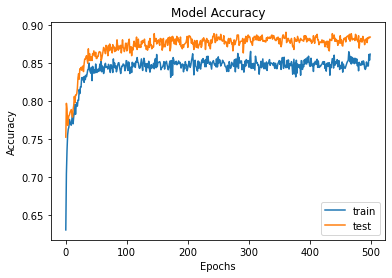

In [33]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='best')
plt.show()

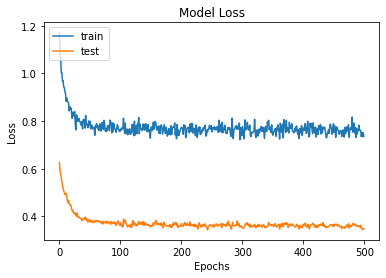

In [34]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [35]:
y_pred1 = model1.predict(X)
y_pred1

105/105 [==============================] - 0s 2ms/step


array([[0.2793246 ],
       [0.13457213],
       [0.10033093],
       ...,
       [0.35117534],
       [0.5887423 ],
       [0.22699529]], dtype=float32)

In [36]:
for i in range(len(y_pred1)):
    if y_pred1[i][0]>0.5:
        y_pred1[i][0]=1
    else:
        y_pred1[i][0]=0
    print(y_pred1[i][0]) 

0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0


0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [37]:
cm1 = confusion_matrix(Y,y_pred1)
cm1

array([[2535,  315],
       [  76,  407]], dtype=int64)

In [38]:
TN=2535
TP=407
FP=315
FN=76

# Sensitivity

In [39]:
sensitivity = (TP/(TP+FN))*100
sensitivity

84.26501035196688

# Specificity

In [40]:
specificity= (TN/(TN+FP))*100
specificity

88.94736842105263

# Precision

In [41]:
precision = (TP/(TP+FP))*100
precision

56.371191135734065

# F score

In [42]:
f_score= (2*precision*sensitivity)/(precision+sensitivity)
f_score

67.55186721991701

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      2850
           1       0.56      0.84      0.68       483

    accuracy                           0.88      3333
   macro avg       0.77      0.87      0.80      3333
weighted avg       0.91      0.88      0.89      3333



In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

0.8660618938650975


Text(0, 0.5, 'True Positive Rate')

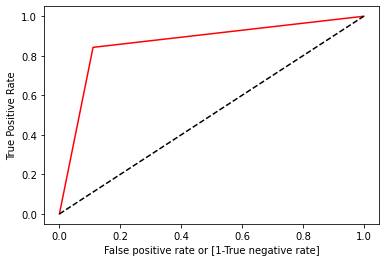

In [45]:
fpr,tpr, thresholds = roc_curve(Y,y_pred1)

auc= roc_auc_score(Y,y_pred1)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr, color='red', label = 'logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False positive rate or [1-True negative rate]')
plt.ylabel('True Positive Rate')

### Hence, we can see that although the overall accuracy of neural network model has decreased slightly from 89.62% to 88.27%,the model is able to predcit the classes more accurately.